# WeatherPy

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate City list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

# Perform API calls

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


print("Beginning of city test")
print("-----------------------------")

for index, city in enumerate (cities):
    
        response = requests.get(query_url + city).json()
        try:
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            
            print(f"Found city is : {city}") 
  
        except(KeyError, IndexError):
            print("City not found. Skipping...")

print("-----------------------------")
print("End of city test")

Beginning of city test
-----------------------------
Found city is : vaini
Found city is : cherskiy
Found city is : hualmay
Found city is : santa rosalia
Found city is : rikitea
Found city is : noumea
Found city is : butaritari
Found city is : norman wells
Found city is : ponta do sol
City not found. Skipping...
Found city is : shymkent
Found city is : busselton
Found city is : qaanaaq
Found city is : corat
Found city is : cape town
Found city is : port alfred
Found city is : lagoa
Found city is : cabo san lucas
Found city is : mahebourg
Found city is : comodoro rivadavia
Found city is : bluff
Found city is : tuktoyaktuk
Found city is : mataura
Found city is : wanning
City not found. Skipping...
Found city is : lompoc
City not found. Skipping...
Found city is : muros
Found city is : darhan
Found city is : port hardy
Found city is : punta arenas
Found city is : agirish
Found city is : davila
Found city is : new norfolk
Found city is : umm kaddadah
Found city is : formosa
Found city is :

Found city is : buraydah
Found city is : san patricio
Found city is : salalah
Found city is : quatre cocos
Found city is : kautokeino
City not found. Skipping...
Found city is : presidente epitacio
Found city is : mhango
Found city is : mastic beach
Found city is : doha
Found city is : cockburn town
Found city is : phan thiet
Found city is : kalianget
Found city is : port blair
Found city is : opuwo
Found city is : bukama
City not found. Skipping...
Found city is : dubno
Found city is : asuncion
Found city is : dudinka
Found city is : alofi
Found city is : laranjeiras do sul
Found city is : cabinda
Found city is : san andres
Found city is : jiwani
Found city is : luanda
Found city is : inirida
Found city is : dongsheng
Found city is : cubuk
Found city is : gunjur
Found city is : ginir
City not found. Skipping...
Found city is : atherton
Found city is : humberto de campos
Found city is : palmas
Found city is : lodja
Found city is : namatanai
Found city is : zhongshu
Found city is : erti

# Convert Data to DataFrame

In [12]:
city_df = pd.DataFrame({'City': city_name, 'Lat' : lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 
                             'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country, 'Date': date
                            })
city_df.head()
city_df.to_csv("../cities.csv")

In [14]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.557061,15.142990,56.491413,74.324275,59.815217,7.569529,1.636843e+09
std,33.243600,89.755908,24.659546,20.970680,38.748881,5.884179,1.856037e+02
min,-54.800000,-179.166700,-27.600000,9.000000,0.000000,0.000000,1.636842e+09
25%,-8.778975,-64.874150,39.327500,65.000000,20.000000,3.440000,1.636843e+09
50%,21.299450,23.153950,63.670000,79.000000,75.000000,5.990000,1.636843e+09
75%,48.720650,95.732125,76.317500,91.000000,98.000000,10.112500,1.636843e+09
max,78.218600,178.416700,95.670000,100.000000,100.000000,34.720000,1.636843e+09


# Plot Data

### Temp vs Lat

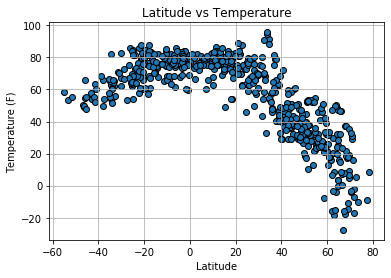

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid()
plt.show()

plt.savefig("Images/Lat_Temp.png")

According to the plot, the temperature increases the closer to the equator.

### Humidity vs Lat

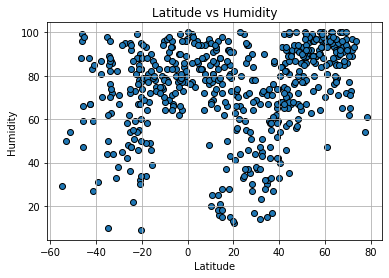

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid()
plt.show()

plt.savefig("Images/Lat_humidity.png")

According to the graph, there is no correlation to latitude and humidity.

### Cloudiness vs Lat

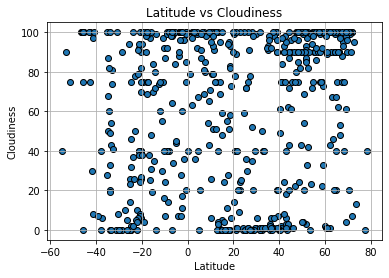

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid()
plt.show()

plt.savefig("Images/Lat_cloudiness.png")

According to the plot, there is no correlation to cloudiness and latitude.

### Windspeed vs Lat

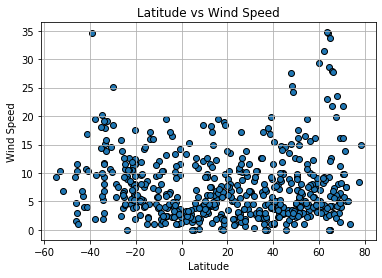

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.grid()
plt.show()

plt.savefig("Images/Lat_wind.png")

According to the plot, there is no correlation to wind speed and latitude.

# Linear Regression

In [22]:
northern_hemisphere = city_df.loc[city_df["Lat"]>=0]
southern_hemisphere= city_df.loc[city_df["Lat"]<0]

### North Hem / Temp vs Lat Regression

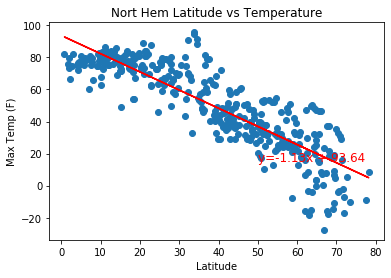

The rvalue is: -0.8626353583472666


<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Nort Hem Latitude vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(50,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hem_vs_temp.png")

Based on the chart, there is a strong negative correlation between north hem temperatures and latitude positions. The further the city is to the equator the higher the temperature.

### South Hem / Temp vs Lat Regression

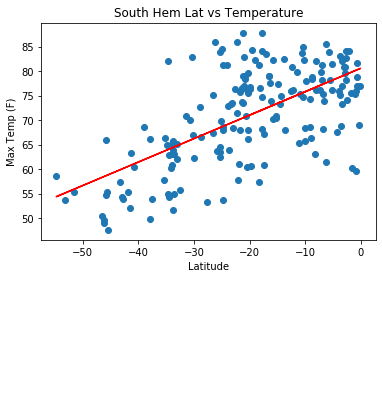

The rvalue is: 0.6386444528470052


<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("South Hem Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-20,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hem_vs_temp.png")

According to the chart, there is a strong positive correlation between the south hem temperatures and the latitude positions. The further away the city is from the equator the lower the temp.

### North Hem / Humidity (%) vs. Lat Regression

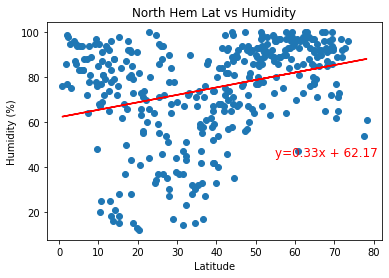

The rvalue is: 0.3082717758440408


<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("North Hem Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (55,45),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hem_vs_humid.png")

According to the plot, there is a weak positive correlation between Nothern Hem humidity and lat. As lat increases humidity also increases slightly.

### South Hem - Humidity (%) vs. Lat Regression

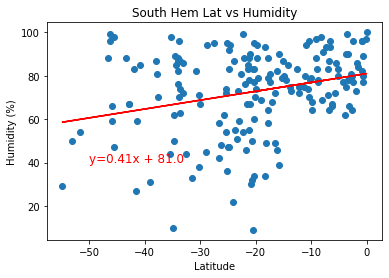

The rvalue is: 0.27982529959465974


<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("South Hem Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,40),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hem_vs_humid.png")

According to the chart there is no correlation between south hem humidity and lat position.

### North Hem / Cloudiness vs Lat Regression

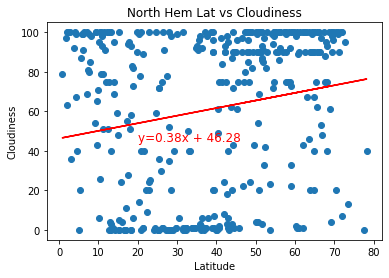

The rvalue is: 0.19706493284295734


<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("North Hem Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hem_vs_cloud.png")

According to the chart, there is a weak positive correlation between cloudiness and lat in the north hem. As lat increases cloudiness also increases slightly.

### South Hem / Cloudiness vs Lat Regression

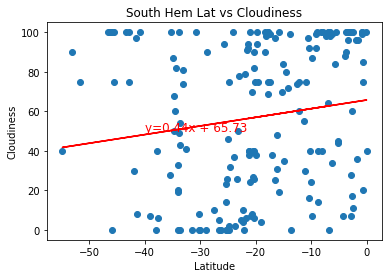

The rvalue is: 0.15421450719154117


<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("South Hem Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-40,50),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hem_vs_cloud.png")

According to the plot there is a weak positive correlation between cloudiness and lat in the southern hem. As lat increases cloudiness also increases slightly based on the regression line.

### North Hem / Wind Speed vs Lat Regression

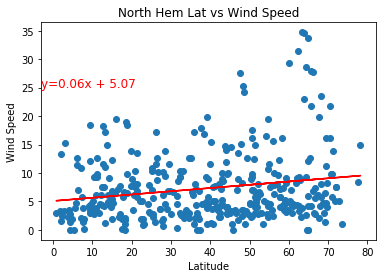

The rvalue is: 0.18803955960758736


<Figure size 432x288 with 0 Axes>

In [33]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("North Hem Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-3,25),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hem_vs_wind.png")

According to the chart there is no correlation to between the variables. The regression line does show a weak positive relationship.

### South Hem / Wind Speed vs Lat Regression

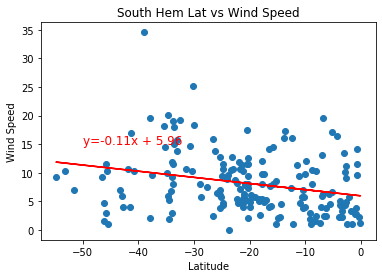

The rvalue is: -0.26558589220584883


<Figure size 432x288 with 0 Axes>

In [34]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("South Hem Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hem_vs_wind.png")

According to the chart there is a weak negative correlation between wind speed and lat in the south hem.